## Fully competitive
## Win-stay, lose-shift with random events (simultaneous for both companies)

9 possible random events. a price can go up, down or stay constant.
1)up, constant
2)constant, up
3)down, constant
4)constant, down
5)up, down
6)down, up
7)up, up
8)down, down
9)constant, constant

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [56]:
# Two competing companies A and B
# A initially dominates the market completely
# B enters the market 
# products are completely the same. Only difference they have is the product's price
fA = [1]  # market share of A (fraction of customers)
fB = [0] # market share of B (fraction of customers)
P_A = [10] #price of A product
P_B = [9]  #price of B product
cost = 0 # cost = constant 
Inc_A = [fA[0]*P_A[0]-cost] # Income per round of A. All customers initially use product A
Inc_B = [0] # Income per round of B. No customers use product B initially
count_zero_IncA = 0 # counting how many concecutive zero income values per round A has (max = 1)
count_zero_IncB = 0 # counting how many concecutive zero income values per round A has (max = 1)
actionA = 0 # initial action is to remain at the same value as before (2 possible actions 0, -1 and one acquired +1)
actionB = 0 # initial action is to remain at the same value as before (2 possible actions 0, -1 and one acquired +1)
dt = 0.51 # time step = market's senstitivity to price changes
vima = 1 # change of price per step (it is also the threshold because we cannot have zero price)
i = 0 # current step
# B enters the market and it gets attention

In [57]:
while count_zero_IncA < 1 and count_zero_IncB < 1: # if the income of a company is zero the company goes bankrupt
    dP = np.abs(P_A[i] - P_B[i]) # Price difference, which defines the flow of costumers
    # check whose price is smaller and how that affects their share of customers and their total capital
    if P_A[i] > P_B[i]:
        fA.append(fA[i] - fA[i] * dP * dt)
        fB.append(fB[i] + fA[i] * dP * dt)
        Inc_A.append(fA[i+1] * P_A[i] - cost)
        Inc_B.append(fB[i+1] * P_B[i] - cost)
    elif P_A[i] < P_B[i]:
        fA.append(fA[i] + fB[i] * dP * dt)
        fB.append(fB[i] - fB[i] * dP * dt)
        Inc_A.append(fA[i+1] * P_A[i] - cost)
        Inc_B.append(fB[i+1] * P_B[i] - cost)
    else:
        fA.append(fA[i])
        fB.append(fB[i])
        Inc_A.append(fA[i+1] * P_A[i] - cost)
        Inc_B.append(fB[i+1] * P_B[i] - cost)
        
    r = np.random.randint(9000) # random event that can affect the two companies in a correlated manner
    # 9 random events
    if r == 0: # A up, B constant
        actionA = 1
        actionB = 0
        P_A.append(P_A[i] + actionA)
        P_B.append(P_B[i] + actionB)
        
    elif r == 1: # A constant, B up
        actionA = 0
        actionB = 1
        P_A.append(P_A[i] + actionA)
        P_B.append(P_B[i] + actionB)
        
    elif r == 2: # A down, B constant
        actionA = -1
        actionB = 0
        if P_A[i] != 1:
            P_A.append(P_A[i] + actionA)
        else: 
            P_A.append(1) # You cannot give it for free. Minimum possible price 
        P_B.append(P_B[i] + actionB)
        
    elif r == 3: # A constant, B down
        actionA = 0
        actionB = -1
        if P_B[i] != 1:
            P_B.append(P_B[i] + actionB)
        else: 
            P_B.append(1) # You cannot give it for free. Minimum possible price 
        P_A.append(P_A[i] + actionA)
        
    elif r == 4: # A up, B down
        actionA = 1
        actionB = -1
        P_A.append(P_A[i] + actionA)
        if P_B[i] != 1:
            P_B.append(P_B[i] + actionB)
        else: 
            P_B.append(1)
            
    elif r == 5: # A down, B up
        actionA = -1
        actionB = 1
        if P_A[i] != 1:
            P_A.append(P_A[i] + actionA)
        else: 
            P_A.append(1)
        P_B.append(P_B[i] + actionB)
        
    elif r == 6: # A up, B up
        actionA = 1
        actionB = 1
        P_A.append(P_A[i] + actionA)
        P_B.append(P_B[i] + actionB)
        
    elif r == 7: # A down, B down
        actionA = -1
        actionB = -1
        if P_A[i] != 1:
            P_A.append(P_A[i] + actionA)
        else: 
            P_A.append(1)
        
        if P_B[i] != 1:
            P_B.append(P_B[i] + actionB)
        else: 
            P_B.append(1) 
    
    elif r == 8: # A constant, B constant
        actionA = 0
        actionB = 0
        P_A.append(P_A[i] + actionA)
        P_B.append(P_B[i] + actionB)
        
    else: # No random event happens     
        # If you lose change your action from the previous step. Otherwise keep doing the same action.
        if Inc_A[i+1] < Inc_A[i]: #not winning = change action
            if actionA != 0: # if you were either increasing or decreasing the prices and it didn't work then stop and stay consant for a step
                actionA = 0
                if P_A[i] > vima: #maximum absolut possible step
                    P_A.append(P_A[i] + actionA) # the size of the decrease of the price
                elif P_A[i] >= 1:
                    P_A.append(1) # You cannot give it for free. Minimum possible price 
            elif actionA == 0:
                actionA = -vima
                if P_A[i] > vima: #maximum absolut possible step
                    P_A.append(P_A[i] + actionA) # the size of the decrease of the price
                elif P_A[i] >= 1:
                    P_A.append(1)      
        else: # winning. keep it up
            if P_A[i] > vima: #maximum absolut possible step
                P_A.append(P_A[i] + actionA) # the size of the decrease of the price
            elif P_A[i] >= 1:
                P_A.append(1) 

        if Inc_B[i+1] <= Inc_B[i]:
            if actionB != 0: # if you were either increasing or decreasing the prices and it didn't work then stop and stay consant for a step
                actionB = 0
                if P_B[i] > vima: #maximum absolut possible step
                    P_B.append(P_B[i] + actionB) # the size of the decrease of the price
                elif P_B[i] >= 1:
                    P_B.append(1) # You cannot give it for free. Minimum possible price 
            elif actionB == 0:
                actionB = -vima
                if P_B[i] > vima: #maximum absolut possible step
                    P_B.append(P_B[i] + actionB) # the size of the decrease of the price
                elif P_B[i] >= 1:
                    P_B.append(1)       
        else: # not losing? keep it up
            if P_B[i] > vima: #maximum absolut possible step
                P_B.append(P_B[i] + actionB) # the size of the decrease of the price
            elif P_B[i] >= 1:
                P_B.append(1)   
                
    if Inc_A[i+1] <= 0:
        count_zero_IncA += 1 # count how many consecutive times the income was zero. The process stops with two consecutive times
    else:
        count_zero_IncA = 0 # if it is not consecutive then restart counting from zero
        
    if Inc_B[i+1] <= 0: 
        count_zero_IncB += 1
    else:
        count_zero_IncB = 0
    
    i += 1

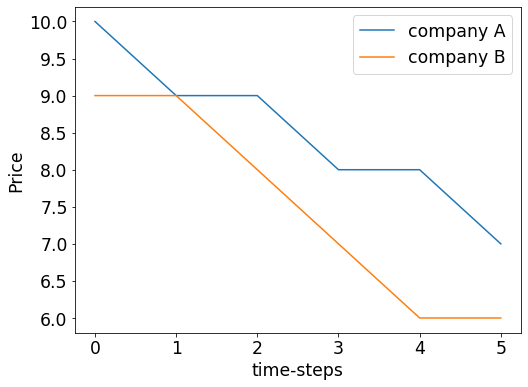

In [58]:
#plot product prices
fig, ax = plt.subplots(figsize=[8,6])
ax.plot(P_A,label='company A')
ax.plot(P_B,label='company B')
ax.set_xlabel('time-steps',fontsize='xx-large')
ax.set_ylabel("Price",fontsize='xx-large')
ax.tick_params(labelsize='xx-large')
ax.legend(fontsize='xx-large')
#fig.savefig('W-S, L-S price random correlated.png');

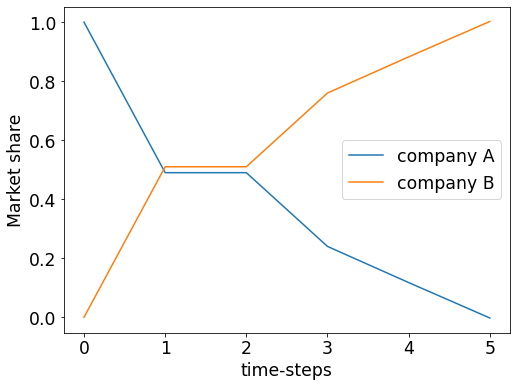

In [59]:
#plot market share
fig, ax = plt.subplots(figsize=[8,6])
ax.plot(fA, label='company A')
ax.plot(fB, label='company B')
ax.set_xlabel('time-steps',fontsize='xx-large')
ax.set_ylabel("Market share",fontsize='xx-large')
ax.tick_params(labelsize='xx-large')
ax.legend(fontsize='xx-large')
#fig.savefig('W-S, L-S market share random correlated.png');

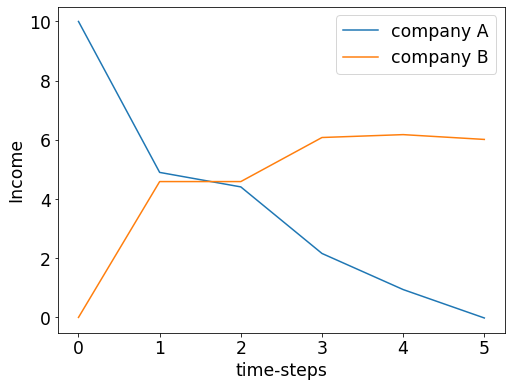

In [60]:
#plot income per round
fig, ax = plt.subplots(figsize=[8,6])
ax.plot(Inc_A, label='company A')
ax.plot(Inc_B, label='company B')
ax.set_xlabel('time-steps',fontsize='xx-large')
ax.set_ylabel("Income",fontsize='xx-large')
ax.tick_params(labelsize='xx-large')
ax.legend(fontsize='xx-large')
#fig.savefig('W-S, L-S income random correlated.png');

In [61]:
print(len(Inc_A))

print(Inc_A[-1])

print(len(Inc_B))

print(Inc_B[-1])

6
-0.018823840000000036
6
6.01411788


In [62]:
Dif_Inc_A = []
Dif_Inc_B = []
trendA = []
trendB = []
for i in range(len(Inc_A)-1):
    Dif_Inc_A.append(Inc_A[i+1] - Inc_A[i])
    Dif_Inc_B.append(Inc_B[i+1] - Inc_B[i])
    if Dif_Inc_A[i] > 0:
        trendA.append(1)
    elif Dif_Inc_A[i] == 0: 
        trendA.append(0)
    else:
        trendA.append(-1)
    if Dif_Inc_B[i] > 0:
        trendB.append(1)
    elif Dif_Inc_B[i] == 0: 
        trendB.append(0)
    else:
        trendB.append(-1)   

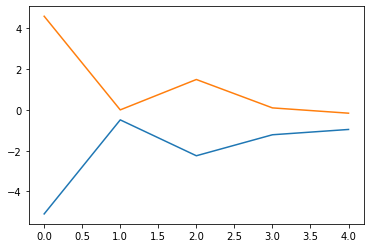

In [63]:
#Differences in Income per step
plt.clf()
plt.plot(Dif_Inc_A)
plt.plot(Dif_Inc_B);

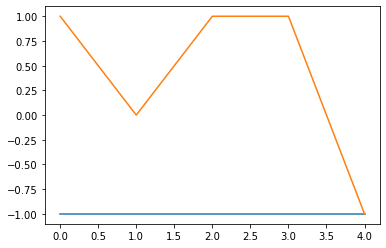

In [64]:
#Result of company strategies (win,lose or none) regarding profit
plt.clf()
plt.plot(trendA)
plt.plot(trendB);

In [65]:
common_growth = [i for i in range(len(Inc_A)-1) if trendA[i] == 1 and trendB[i] == 1]
peace = [i for i in range(len(Inc_A)-1) if (trendA[i] == 0 and trendB[i] == 0) or (trendA[i] == 1 and trendB[i] == 0) or (trendA[i] == 0 and trendB[i] == 1)]
war = [i for i in range(len(Inc_A)-1) if trendA[i] == -1 or trendB[i] == -1]
print(common_growth)
print(len(common_growth))
print('common growth (%) =',100*len(common_growth)/(len(Inc_A)-1),'\n')
print(peace)
print(len(peace))
print('peace (%) =',100*len(peace)/(len(Inc_A)-1),'\n')
print(war)
print(len(war))
print('war (%) =',100*len(war)/(len(Inc_A)-1),'\n')

[]
0
common growth (%) = 0.0 

[]
0
peace (%) = 0.0 

[0, 1, 2, 3, 4]
5
war (%) = 100.0 



In [66]:
condition = []
for i in range(len(Inc_A)):
    if i in common_growth:
        condition.append(1)
    elif i in peace:
        condition.append(0)
    elif i in war:
        condition.append(-1)

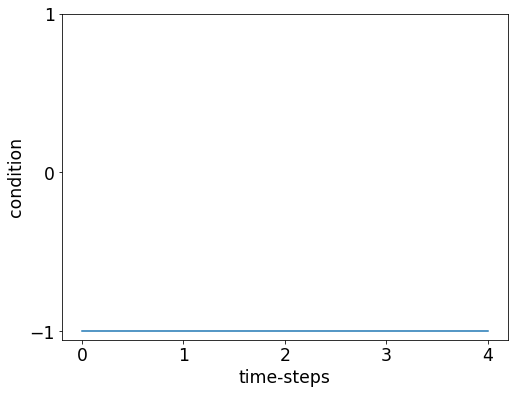

In [67]:
#plot condition
fig, ax = plt.subplots(figsize=[8,6])
plt.plot(condition);
ax.set_xlabel('time-steps',fontsize='xx-large')
ax.set_ylabel('condition',fontsize='xx-large')
ax.set_yticks([-1,0,1])
ax.tick_params(labelsize='xx-large')
fig.savefig('W-S, L-S condition random correlated.png');

## Repeat it with different probabilities of random events

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


common growth (%) = 0.0 

peace (%) = 0.0 

war (%) = 100.0 

time = 6


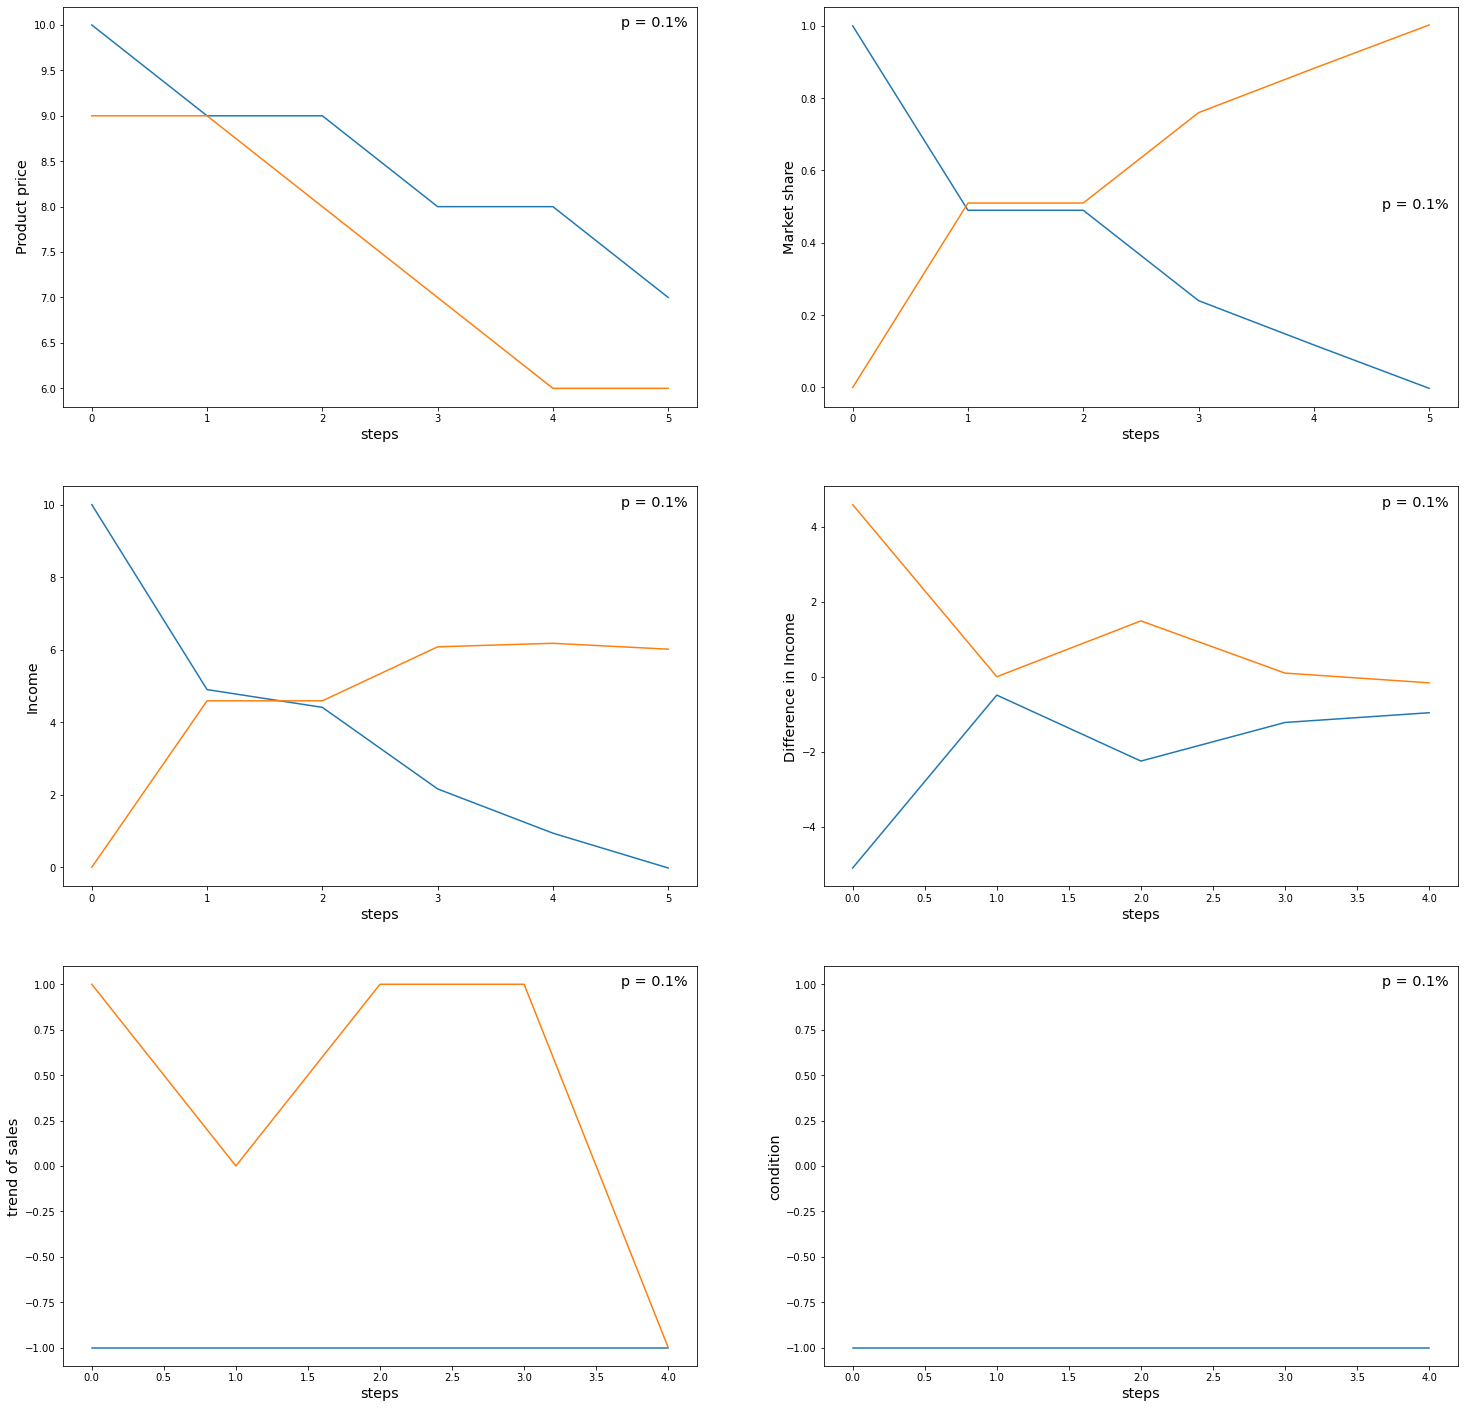

In [68]:
#plot product prices (p = 0.1%)
fig, ax = plt.subplots(3, 2, figsize=(25, 25))
ax = np.ravel(ax)

ax[0].plot(P_A)
ax[0].plot(P_B)
ax[0].set_xlabel('steps', fontsize='x-large')
ax[0].set_ylabel('Product price', fontsize='x-large')
ax[0].legend(title='p = 0.1%',frameon=False, title_fontsize = 'x-large');

ax[1].plot(fA)
ax[1].plot(fB)
ax[1].set_xlabel('steps', fontsize='x-large')
ax[1].set_ylabel('Market share', fontsize='x-large')
ax[1].legend(title='p = 0.1%',frameon=False, title_fontsize = 'x-large');

ax[2].plot(Inc_A)
ax[2].plot(Inc_B)
ax[2].set_xlabel('steps', fontsize='x-large')
ax[2].set_ylabel('Income', fontsize='x-large')
ax[2].legend(title='p = 0.1%',frameon=False, title_fontsize = 'x-large');

ax[3].plot(Dif_Inc_A)
ax[3].plot(Dif_Inc_B)
ax[3].set_xlabel('steps', fontsize='x-large')
ax[3].set_ylabel('Difference in Income', fontsize='x-large')
ax[3].legend(title='p = 0.1%',frameon=False, title_fontsize = 'x-large');

ax[4].plot(trendA)
ax[4].plot(trendB)
ax[4].set_xlabel('steps', fontsize='x-large')
ax[4].set_ylabel('trend of sales', fontsize='x-large')
ax[4].legend(title='p = 0.1%',frameon=False, title_fontsize = 'x-large');

ax[5].plot(condition)
ax[5].set_xlabel('steps', fontsize='x-large')
ax[5].set_ylabel('condition', fontsize='x-large')
ax[5].set_ylim(-1.1,1.1)
ax[5].legend(title='p = 0.1%',frameon=False, title_fontsize = 'x-large');

print('common growth (%) =',100*len(common_growth)/(len(Inc_A)-1),'\n')
print('peace (%) =',100*len(peace)/(len(Inc_A)-1),'\n')
print('war (%) =',100*len(war)/(len(Inc_A)-1),'\n')
print('time =',len(Inc_A))

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


common growth (%) = 0.0 

peace (%) = 0.0 

war (%) = 100.0 

time = 6


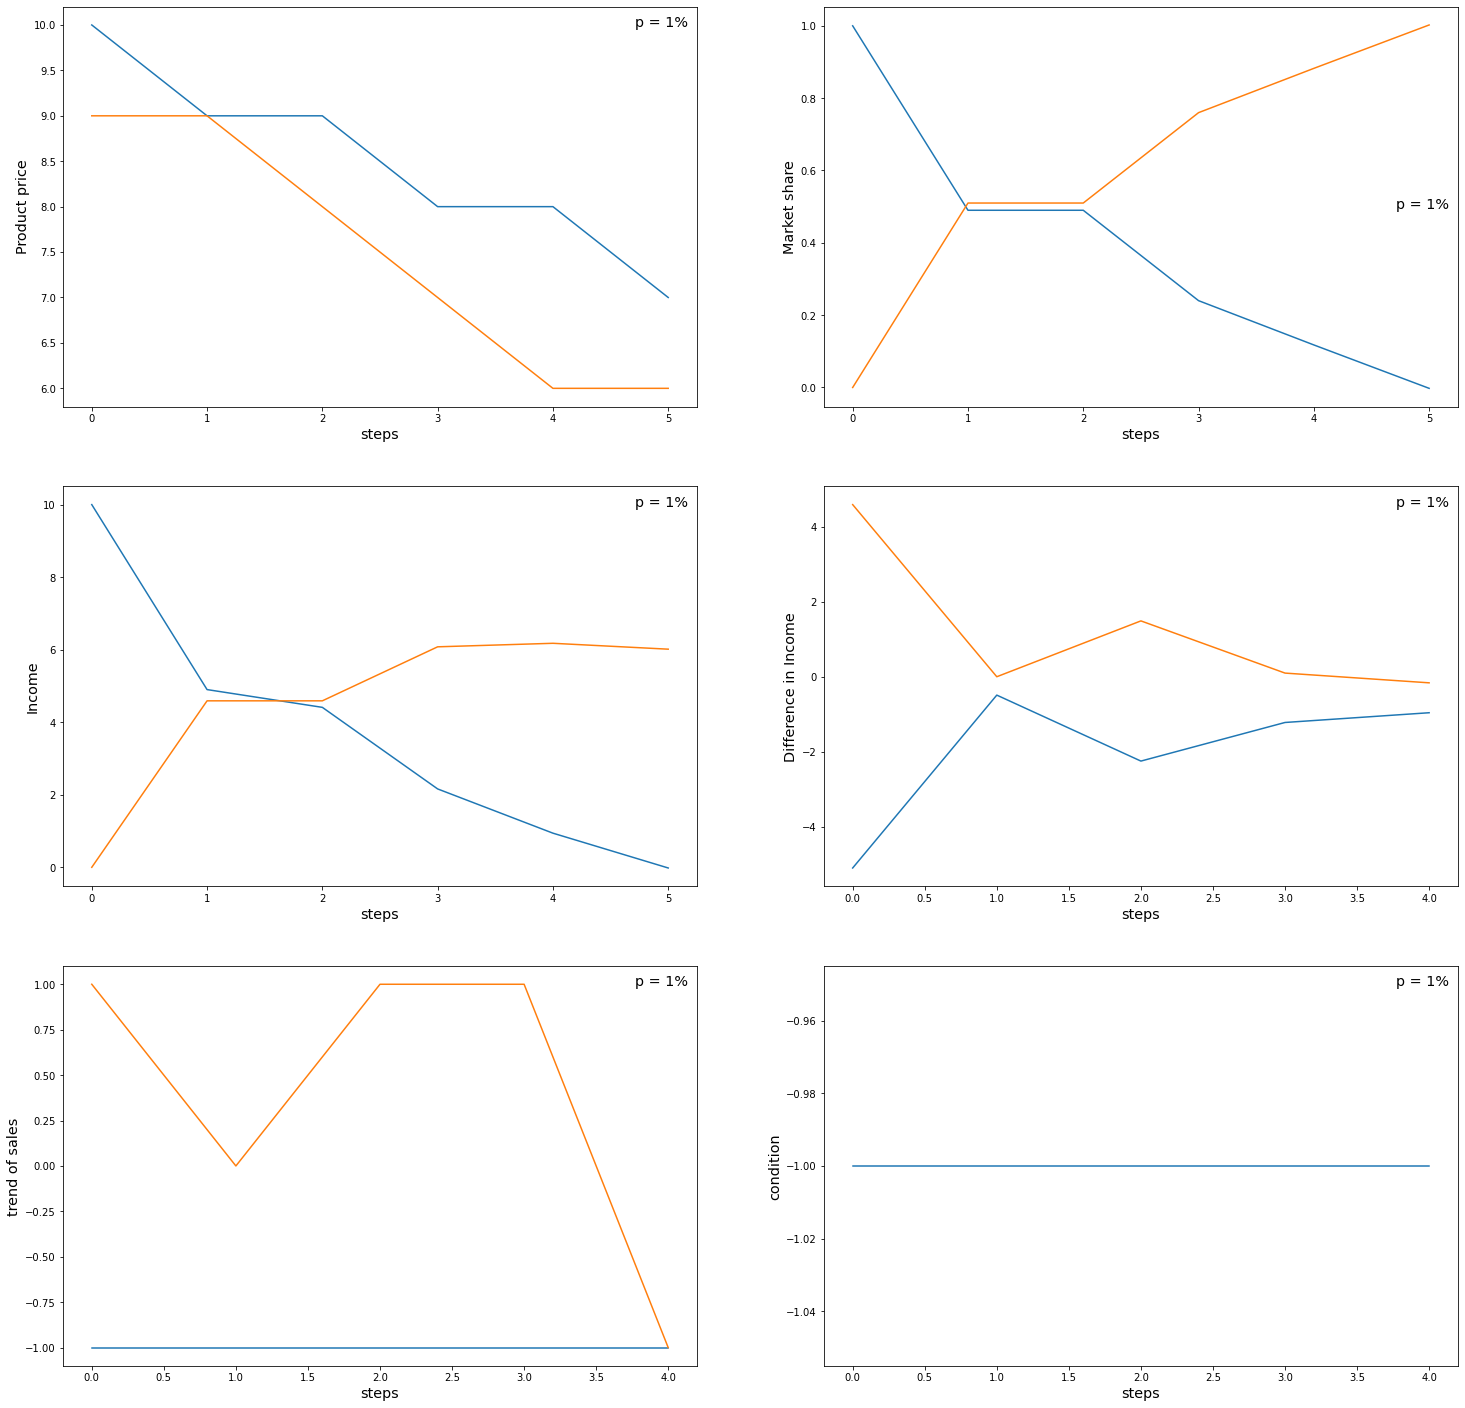

In [55]:
#plot product prices (p = 1%)
fig, ax = plt.subplots(3, 2, figsize=(25, 25))
ax = np.ravel(ax)

ax[0].plot(P_A)
ax[0].plot(P_B)
ax[0].set_xlabel('steps', fontsize='x-large')
ax[0].set_ylabel('Product price', fontsize='x-large')
ax[0].legend(title='p = 1%',frameon=False, title_fontsize = 'x-large');

ax[1].plot(fA)
ax[1].plot(fB)
ax[1].set_xlabel('steps', fontsize='x-large')
ax[1].set_ylabel('Market share', fontsize='x-large')
ax[1].legend(title='p = 1%',frameon=False, title_fontsize = 'x-large');

ax[2].plot(Inc_A)
ax[2].plot(Inc_B)
ax[2].set_xlabel('steps', fontsize='x-large')
ax[2].set_ylabel('Income', fontsize='x-large')
ax[2].legend(title='p = 1%',frameon=False, title_fontsize = 'x-large');

ax[3].plot(Dif_Inc_A)
ax[3].plot(Dif_Inc_B)
ax[3].set_xlabel('steps', fontsize='x-large')
ax[3].set_ylabel('Difference in Income', fontsize='x-large')
ax[3].legend(title='p = 1%',frameon=False, title_fontsize = 'x-large');

ax[4].plot(trendA)
ax[4].plot(trendB)
ax[4].set_xlabel('steps', fontsize='x-large')
ax[4].set_ylabel('trend of sales', fontsize='x-large')
ax[4].legend(title='p = 1%',frameon=False, title_fontsize = 'x-large');

ax[5].plot(condition)
ax[5].set_xlabel('steps', fontsize='x-large')
ax[5].set_ylabel('condition', fontsize='x-large')
ax[5].legend(title='p = 1%',frameon=False, title_fontsize = 'x-large');

print('common growth (%) =',100*len(common_growth)/(len(Inc_A)-1),'\n')
print('peace (%) =',100*len(peace)/(len(Inc_A)-1),'\n')
print('war (%) =',100*len(war)/(len(Inc_A)-1),'\n')
print('time =',len(Inc_A))

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


common growth (%) = 0.0 

peace (%) = 0.0 

war (%) = 100.0 

time = 6


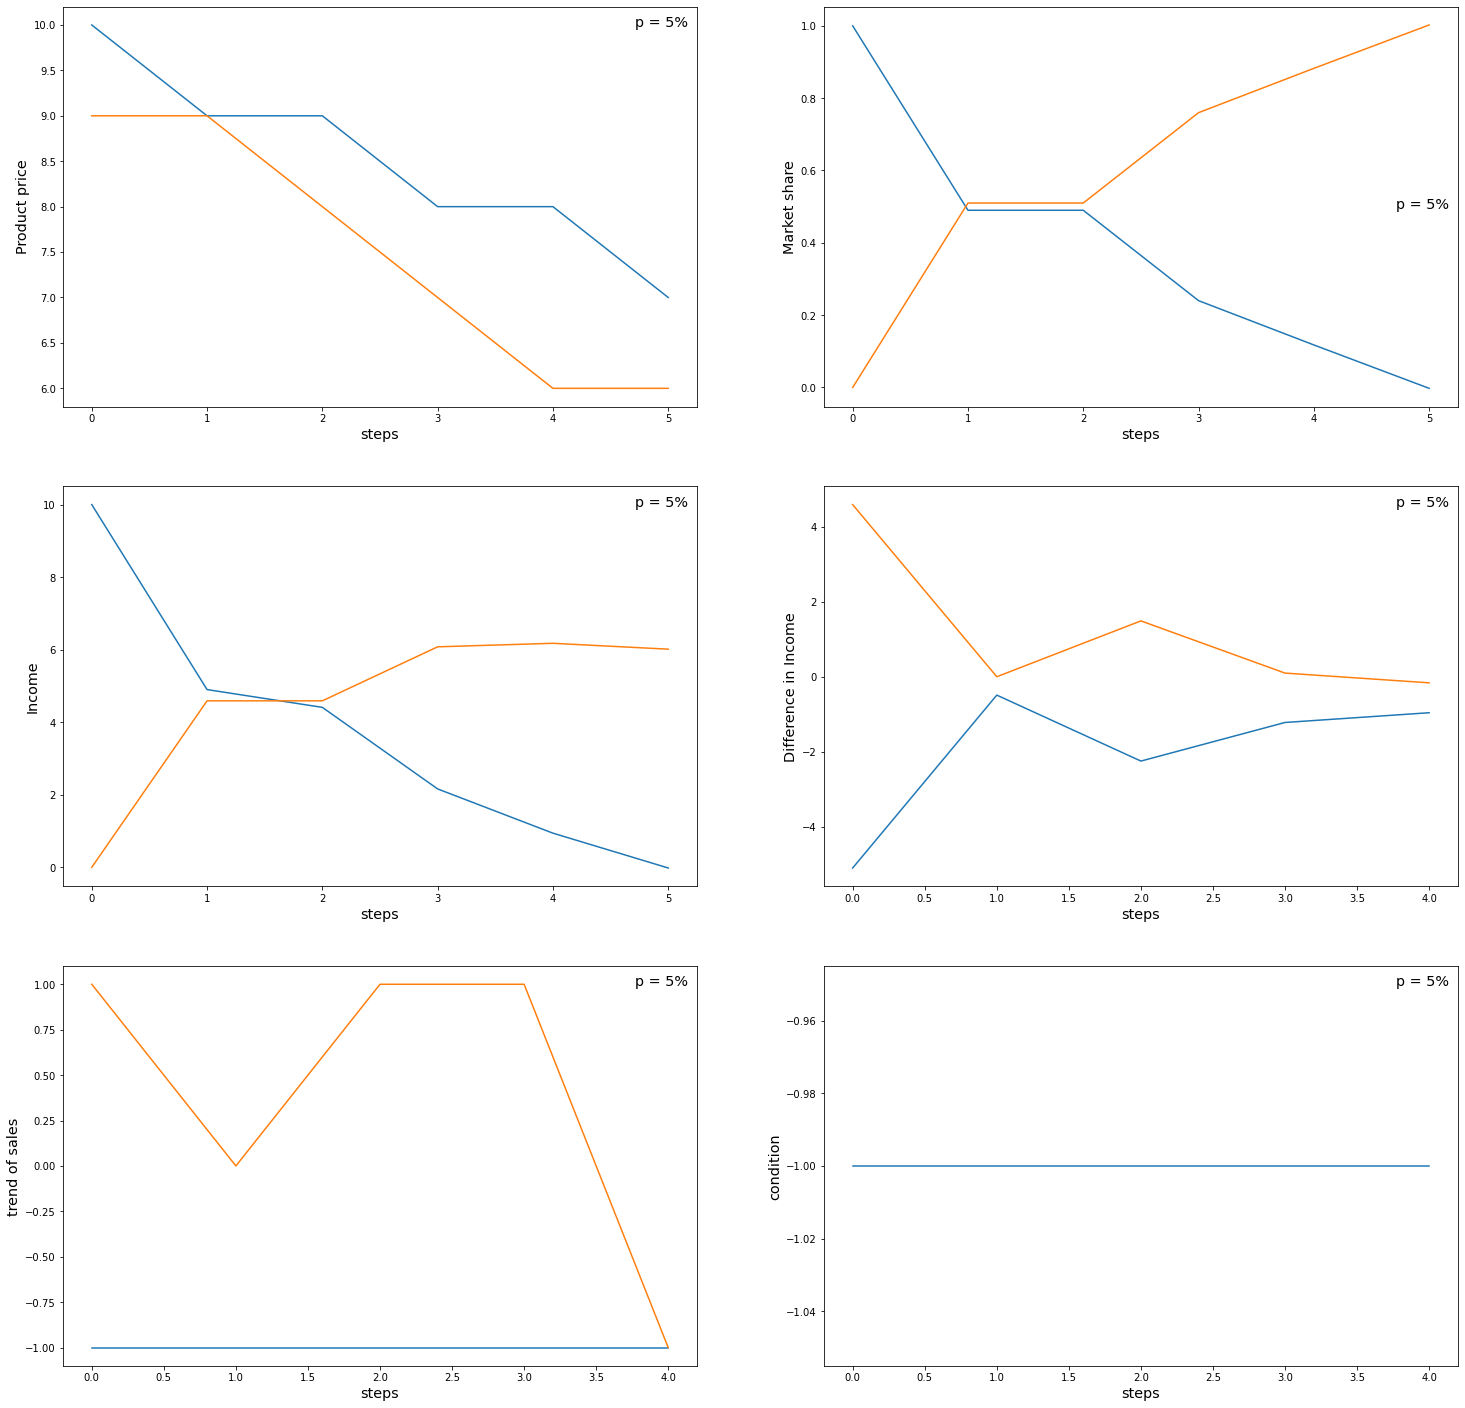

In [41]:
#plot product prices (p = 5%)
fig, ax = plt.subplots(3, 2, figsize=(25, 25))
ax = np.ravel(ax)

ax[0].plot(P_A)
ax[0].plot(P_B)
ax[0].set_xlabel('steps', fontsize='x-large')
ax[0].set_ylabel('Product price', fontsize='x-large')
ax[0].legend(title='p = 5%',frameon=False, title_fontsize = 'x-large');

ax[1].plot(fA)
ax[1].plot(fB)
ax[1].set_xlabel('steps', fontsize='x-large')
ax[1].set_ylabel('Market share', fontsize='x-large')
ax[1].legend(title='p = 5%',frameon=False, title_fontsize = 'x-large');

ax[2].plot(Inc_A)
ax[2].plot(Inc_B)
ax[2].set_xlabel('steps', fontsize='x-large')
ax[2].set_ylabel('Income', fontsize='x-large')
ax[2].legend(title='p = 5%',frameon=False, title_fontsize = 'x-large');

ax[3].plot(Dif_Inc_A)
ax[3].plot(Dif_Inc_B)
ax[3].set_xlabel('steps', fontsize='x-large')
ax[3].set_ylabel('Difference in Income', fontsize='x-large')
ax[3].legend(title='p = 5%',frameon=False, title_fontsize = 'x-large');

ax[4].plot(trendA)
ax[4].plot(trendB)
ax[4].set_xlabel('steps', fontsize='x-large')
ax[4].set_ylabel('trend of sales', fontsize='x-large')
ax[4].legend(title='p = 5%',frameon=False, title_fontsize = 'x-large');

ax[5].plot(condition)
ax[5].set_xlabel('steps', fontsize='x-large')
ax[5].set_ylabel('condition', fontsize='x-large')
ax[5].legend(title='p = 5%',frameon=False, title_fontsize = 'x-large');

print('common growth (%) =',100*len(common_growth)/(len(Inc_A)-1),'\n')
print('peace (%) =',100*len(peace)/(len(Inc_A)-1),'\n')
print('war (%) =',100*len(war)/(len(Inc_A)-1),'\n')
print('time =',len(Inc_A))

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


common growth (%) = 0.0 

peace (%) = 0.0 

war (%) = 100.0 

time = 6


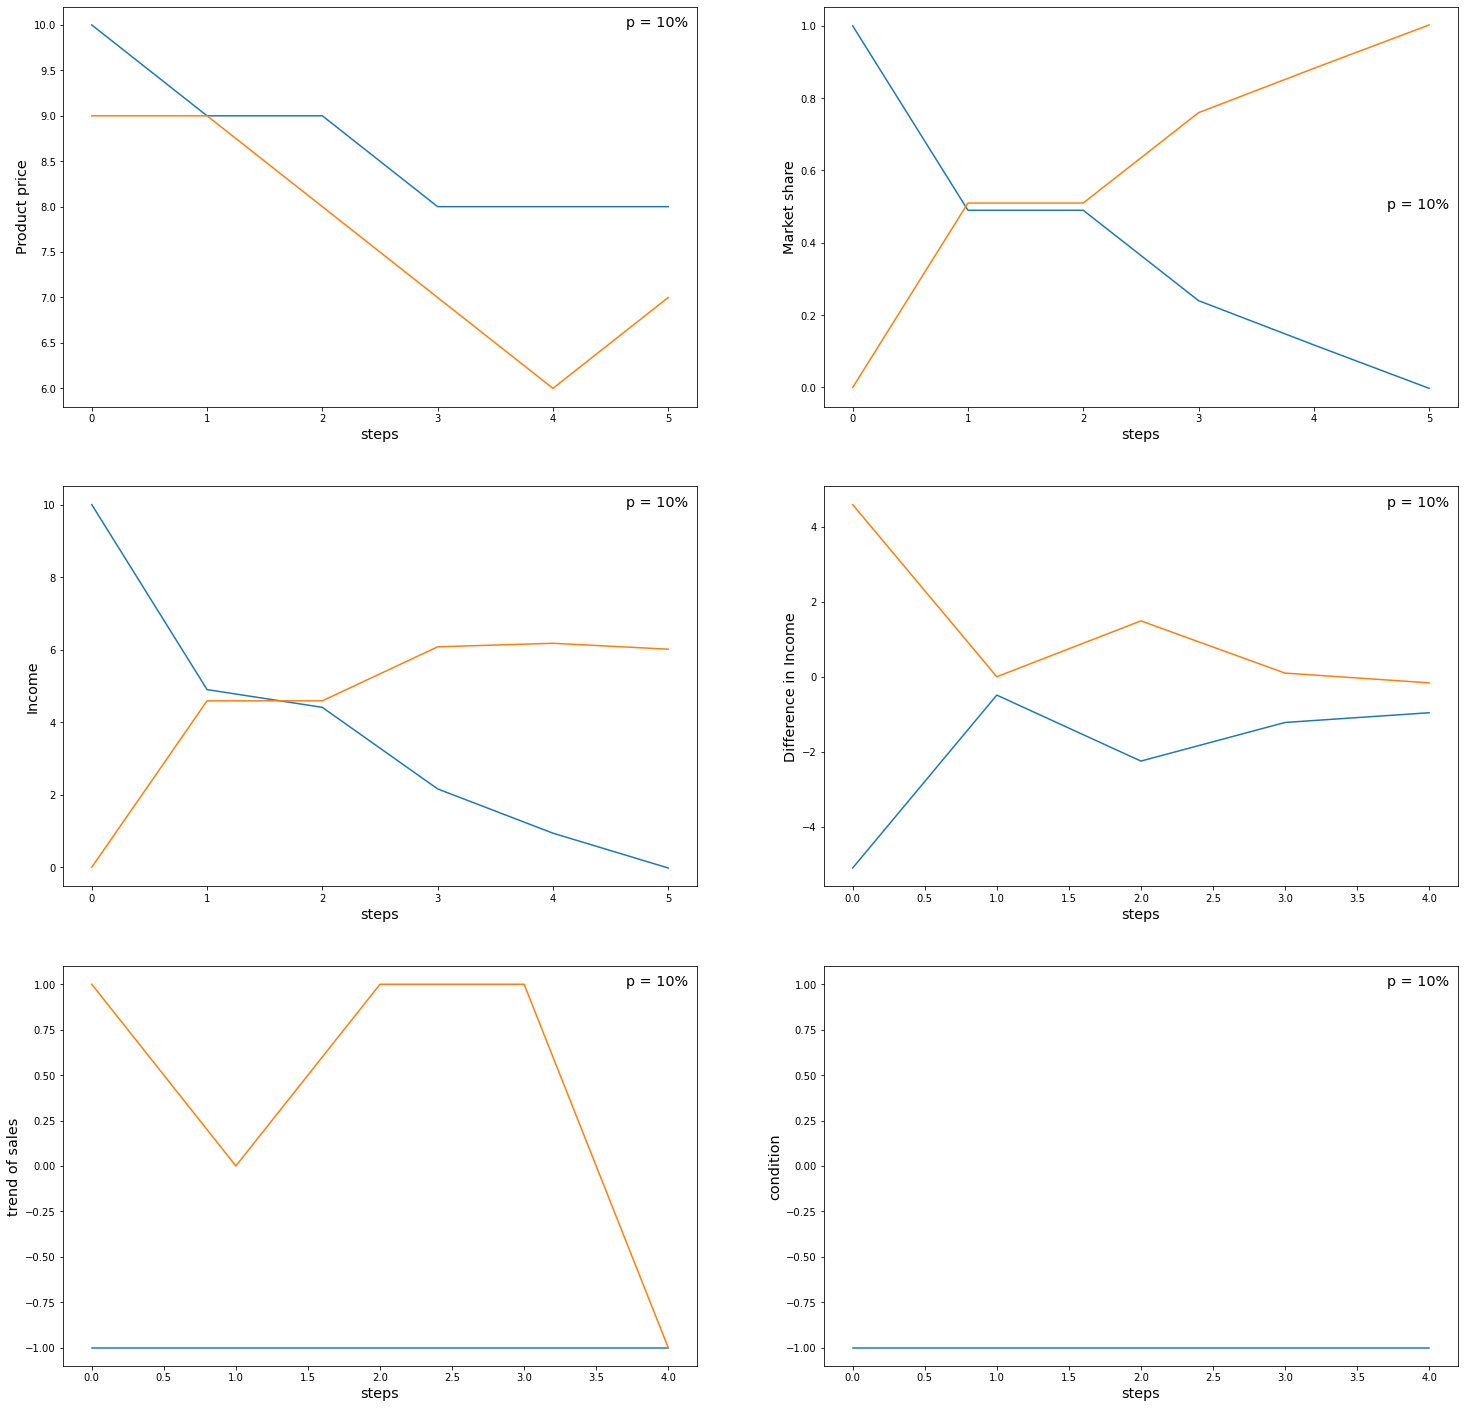

In [28]:
#plot product prices (p = 10%)
fig, ax = plt.subplots(3, 2, figsize=(25, 25))
ax = np.ravel(ax)

ax[0].plot(P_A)
ax[0].plot(P_B)
ax[0].set_xlabel('steps', fontsize='x-large')
ax[0].set_ylabel('Product price', fontsize='x-large')
ax[0].legend(title='p = 10%',frameon=False, title_fontsize = 'x-large');

ax[1].plot(fA)
ax[1].plot(fB)
ax[1].set_xlabel('steps', fontsize='x-large')
ax[1].set_ylabel('Market share', fontsize='x-large')
ax[1].legend(title='p = 10%',frameon=False, title_fontsize = 'x-large');

ax[2].plot(Inc_A)
ax[2].plot(Inc_B)
ax[2].set_xlabel('steps', fontsize='x-large')
ax[2].set_ylabel('Income', fontsize='x-large')
ax[2].legend(title='p = 10%',frameon=False, title_fontsize = 'x-large');

ax[3].plot(Dif_Inc_A)
ax[3].plot(Dif_Inc_B)
ax[3].set_xlabel('steps', fontsize='x-large')
ax[3].set_ylabel('Difference in Income', fontsize='x-large')
ax[3].legend(title='p = 10%',frameon=False, title_fontsize = 'x-large');

ax[4].plot(trendA)
ax[4].plot(trendB)
ax[4].set_xlabel('steps', fontsize='x-large')
ax[4].set_ylabel('trend of sales', fontsize='x-large')
ax[4].legend(title='p = 10%',frameon=False, title_fontsize = 'x-large');

ax[5].plot(condition)
ax[5].set_xlabel('steps', fontsize='x-large')
ax[5].set_ylabel('condition', fontsize='x-large')
ax[5].set_ylim(-1.1,1.1)
ax[5].legend(title='p = 10%',frameon=False, title_fontsize = 'x-large');

print('common growth (%) =',100*len(common_growth)/(len(Inc_A)-1),'\n')
print('peace (%) =',100*len(peace)/(len(Inc_A)-1),'\n')
print('war (%) =',100*len(war)/(len(Inc_A)-1),'\n')
print('time =',len(Inc_A))

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


common growth (%) = 6.25 

peace (%) = 12.5 

war (%) = 81.25 

time = 17


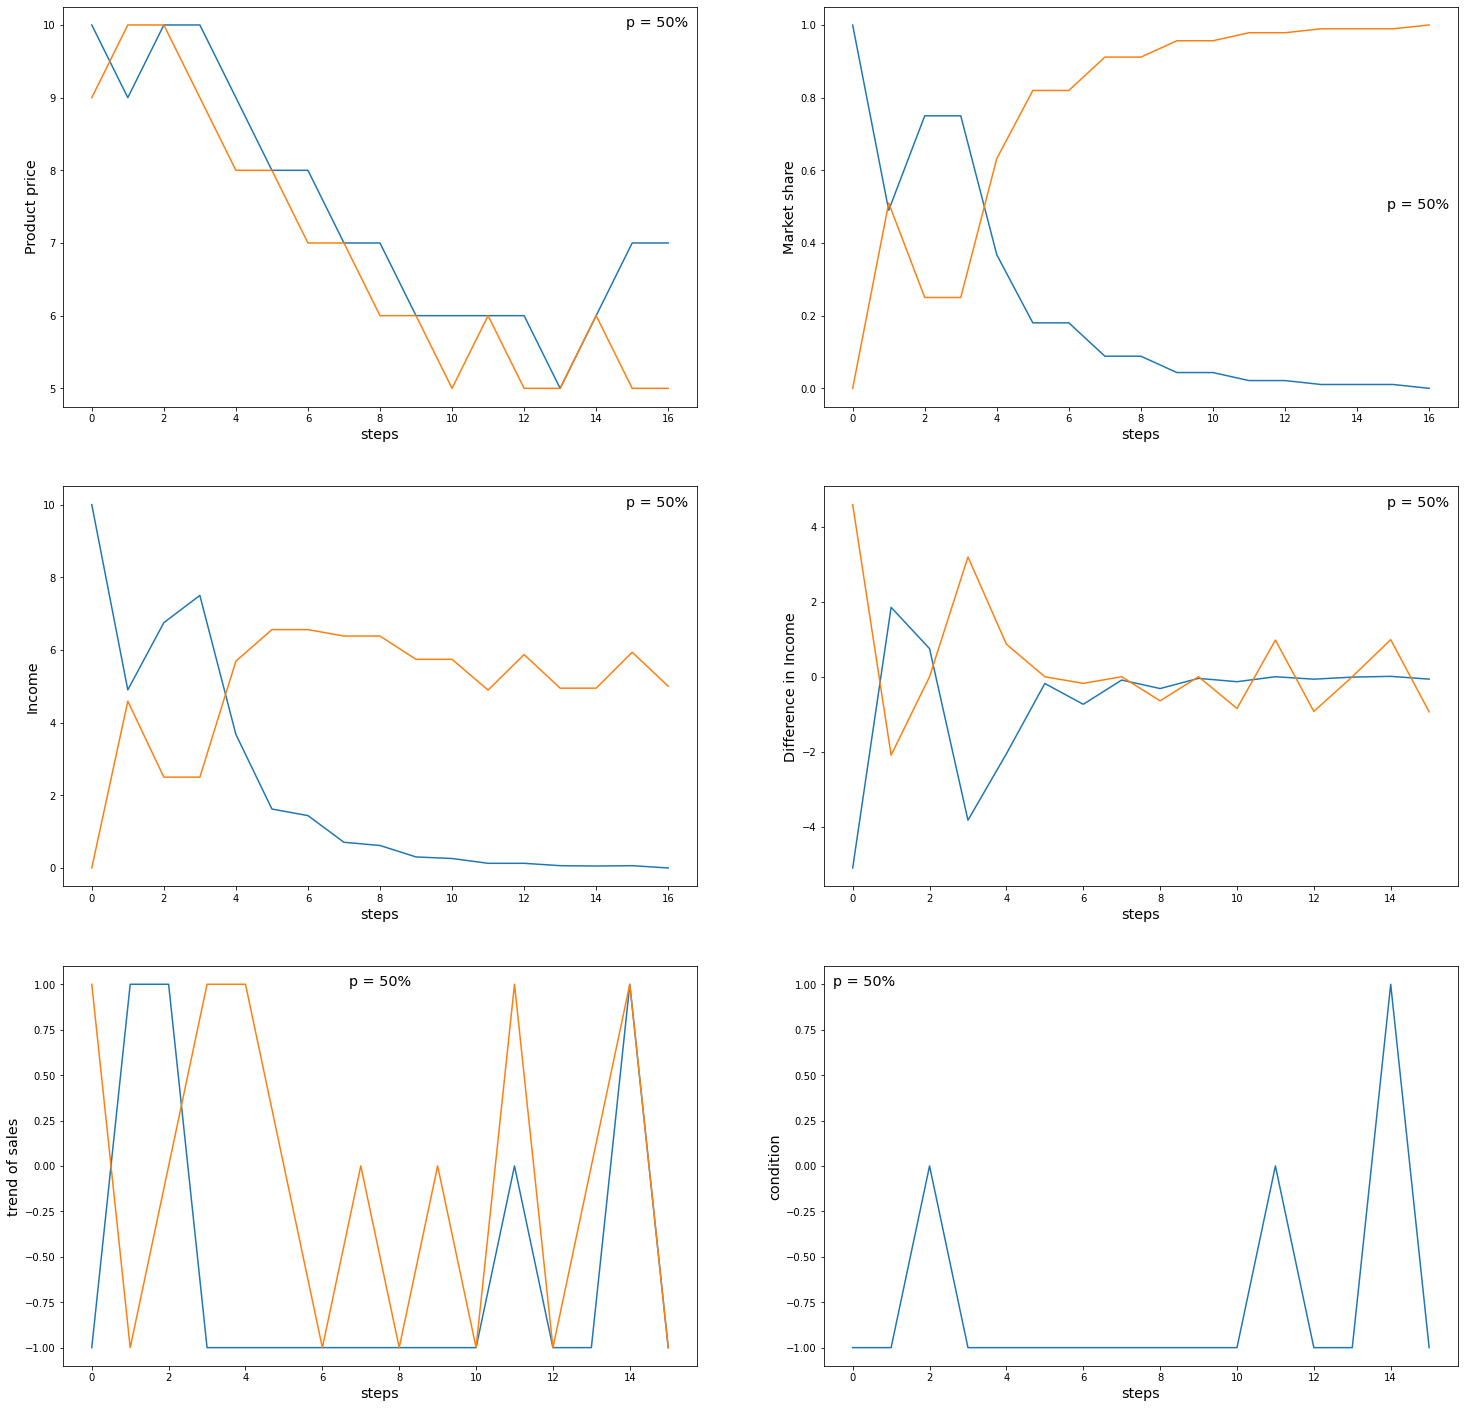

In [14]:
#plot product prices (p = 50%)
fig, ax = plt.subplots(3, 2, figsize=(25, 25))
ax = np.ravel(ax)

ax[0].plot(P_A)
ax[0].plot(P_B)
ax[0].set_xlabel('steps', fontsize='x-large')
ax[0].set_ylabel('Product price', fontsize='x-large')
ax[0].legend(title='p = 50%',frameon=False, title_fontsize = 'x-large');

ax[1].plot(fA)
ax[1].plot(fB)
ax[1].set_xlabel('steps', fontsize='x-large')
ax[1].set_ylabel('Market share', fontsize='x-large')
ax[1].legend(title='p = 50%',frameon=False, title_fontsize = 'x-large');

ax[2].plot(Inc_A)
ax[2].plot(Inc_B)
ax[2].set_xlabel('steps', fontsize='x-large')
ax[2].set_ylabel('Income', fontsize='x-large')
ax[2].legend(title='p = 50%',frameon=False, title_fontsize = 'x-large');

ax[3].plot(Dif_Inc_A)
ax[3].plot(Dif_Inc_B)
ax[3].set_xlabel('steps', fontsize='x-large')
ax[3].set_ylabel('Difference in Income', fontsize='x-large')
ax[3].legend(title='p = 50%',frameon=False, title_fontsize = 'x-large');

ax[4].plot(trendA)
ax[4].plot(trendB)
ax[4].set_xlabel('steps', fontsize='x-large')
ax[4].set_ylabel('trend of sales', fontsize='x-large')
ax[4].legend(title='p = 50%',frameon=False, title_fontsize = 'x-large');

ax[5].plot(condition)
ax[5].set_xlabel('steps', fontsize='x-large')
ax[5].set_ylabel('condition', fontsize='x-large')
ax[5].legend(title='p = 50%',frameon=False, title_fontsize = 'x-large');

print('common growth (%) =',100*len(common_growth)/(len(Inc_A)-1),'\n')
print('peace (%) =',100*len(peace)/(len(Inc_A)-1),'\n')
print('war (%) =',100*len(war)/(len(Inc_A)-1),'\n')
print('time =',len(Inc_A))

## Statistics

In [105]:
stats = 10000 # number of independent model execusions for statistics
num4p = [9000,900,300,180,90,45,30,18] # prob of random event = [0.001,0.01,0.03,0.05,0.1,0.2,0.3,0.5]
#creating the quantities of interest
time = np.zeros([len(num4p),stats])
Common_growth = np.zeros([len(num4p),stats])
Peace = np.zeros([len(num4p),stats])
War = np.zeros([len(num4p),stats])
Mean_IncA = np.zeros([len(num4p),stats])
Max_IncA = np.zeros([len(num4p),stats])
Mean_IncB = np.zeros([len(num4p),stats])
Max_IncB = np.zeros([len(num4p),stats])
who_dies = np.zeros([len(num4p),stats])
#repeating the process many times to get statistics on it
for o in range(len(num4p)):
    print(o)
    for k in range(stats):
        # Two competing companies A and B
        # A initially dominates the market completely
        # B enters the market 
        # products are completely the same. Only difference they have is the product
        fA = [1]  # market share of A (fraction of customers)
        fB = [0] # market share of B (fraction of customers)
        P_A = [10] #price of A product
        P_B = [9]  #price of B product
        cost = 0.001
        Inc_A = [fA[0]*P_A[0]-cost] # Income per round of A. All customers initially use product A
        Inc_B = [0] # Income per round of B. No customers use product B initially
        count_zero_IncA = 0 # counting how many concecutive zero income values per round A has (max = 1)
        count_zero_IncB = 0 # counting how many concecutive zero income values per round A has (max = 1)
        actionA = 0 # initial action is to remain at the same value as before (2 possible actions 0, -1 and one acquired +1)
        actionB = 0 # initial action is to remain at the same value as before (2 possible actions 0, -1 and one acquired +1)
        dt = 0.51 # time step = market's senstitivity to price changes
        vima = 1 # change of price per step (it is also the threshold because we cannot have zero price)
        i = 0 # current step
        # B enters the market and it gets attention
        # Do it stats amount of times to get statistics
        while count_zero_IncA < 1 and count_zero_IncB < 1: # if the income of a company is zero the company goes bankrupt
            dP = np.abs(P_A[i] - P_B[i]) # Price difference, which defines the flow of costumers
            # check whose price is smaller and how that affects their share of customers and their total capital
            if P_A[i] > P_B[i]:
                fA.append(fA[i] - fA[i] * dP * dt)
                fB.append(fB[i] + fA[i] * dP * dt)
                Inc_A.append(fA[i+1] * P_A[i] - cost)
                Inc_B.append(fB[i+1] * P_B[i] - cost)
            elif P_A[i] < P_B[i]:
                fA.append(fA[i] + fB[i] * dP * dt)
                fB.append(fB[i] - fB[i] * dP * dt)
                Inc_A.append(fA[i+1] * P_A[i] - cost)
                Inc_B.append(fB[i+1] * P_B[i] - cost)
            else:
                fA.append(fA[i])
                fB.append(fB[i])
                Inc_A.append(fA[i+1] * P_A[i] - cost)
                Inc_B.append(fB[i+1] * P_B[i] - cost)

            r = np.random.randint(num4p[o]) # random event that can affect the two companies in a correlated manner
            # 9 random events
            if r == 0: # A up, B constant
                actionA = 1
                actionB = 0
                P_A.append(P_A[i] + actionA)
                P_B.append(P_B[i] + actionB)

            elif r == 1: # A constant, B up
                actionA = 0
                actionB = 1
                P_A.append(P_A[i] + actionA)
                P_B.append(P_B[i] + actionB)

            elif r == 2: # A down, B constant
                actionA = -1
                actionB = 0
                if P_A[i] != 1:
                    P_A.append(P_A[i] + actionA)
                else: 
                    P_A.append(1) # You cannot give it for free. Minimum possible price 
                P_B.append(P_B[i] + actionB)

            elif r == 3: # A constant, B down
                actionA = 0
                actionB = -1
                if P_B[i] != 1:
                    P_B.append(P_B[i] + actionB)
                else: 
                    P_B.append(1) # You cannot give it for free. Minimum possible price 
                P_A.append(P_A[i] + actionA)

            elif r == 4: # A up, B down
                actionA = 1
                actionB = -1
                P_A.append(P_A[i] + actionA)
                if P_B[i] != 1:
                    P_B.append(P_B[i] + actionB)
                else: 
                    P_B.append(1)

            elif r == 5: # A down, B up
                actionA = -1
                actionB = 1
                if P_A[i] != 1:
                    P_A.append(P_A[i] + actionA)
                else: 
                    P_A.append(1)
                P_B.append(P_B[i] + actionB)

            elif r == 6: # A up, B up
                actionA = 1
                actionB = 1
                P_A.append(P_A[i] + actionA)
                P_B.append(P_B[i] + actionB)

            elif r == 7: # A down, B down
                actionA = -1
                actionB = -1
                if P_A[i] != 1:
                    P_A.append(P_A[i] + actionA)
                else: 
                    P_A.append(1)

                if P_B[i] != 1:
                    P_B.append(P_B[i] + actionB)
                else: 
                    P_B.append(1) 

            elif r == 8: # A constant, B constant
                actionA = 0
                actionB = 0
                P_A.append(P_A[i] + actionA)
                P_B.append(P_B[i] + actionB)

            else: # No random event happens     
                # If you don't win change your action from the previous step. Otherwise keep doing the same action.
                if Inc_A[i+1] < Inc_A[i]: #not winning = change action
                    if actionA != 0: # if you were either increasing or decreasing the prices and it didn't work then stop and stay consant for a step
                        actionA = 0
                        if P_A[i] > vima: #maximum absolut possible step
                            P_A.append(P_A[i] + actionA) # the size of the decrease of the price
                        elif P_A[i] >= 1:
                            P_A.append(1) # You cannot give it for free. Minimum possible price 
                    elif actionA == 0:
                        actionA = -vima
                        if P_A[i] > vima: #maximum absolut possible step
                            P_A.append(P_A[i] + actionA) # the size of the decrease of the price
                        elif P_A[i] >= 1:
                            P_A.append(1)      
                else: # not losing. keep it up
                    if P_A[i] > vima: #maximum absolut possible step
                        P_A.append(P_A[i] + actionA) # the size of the decrease of the price
                    elif P_A[i] >= 1:
                        P_A.append(1) 

                if Inc_B[i+1] <= Inc_B[i]:
                    if actionB != 0: # if you were either increasing or decreasing the prices and it didn't work then stop and stay consant for a step
                        actionB = 0
                        if P_B[i] > vima: #maximum absolut possible step
                            P_B.append(P_B[i] + actionB) # the size of the decrease of the price
                        elif P_B[i] >= 1:
                            P_B.append(1) # You cannot give it for free. Minimum possible price 
                    elif actionB == 0:
                        actionB = -vima
                        if P_B[i] > vima: #maximum absolut possible step
                            P_B.append(P_B[i] + actionB) # the size of the decrease of the price
                        elif P_B[i] >= 1:
                            P_B.append(1)       
                else: # not losing. keep it up
                    if P_B[i] > vima: #maximum absolut possible step
                        P_B.append(P_B[i] + actionB) # the size of the decrease of the price
                    elif P_B[i] >= 1:
                        P_B.append(1)   

            if Inc_A[i+1] <= 0:
                count_zero_IncA += 1 # count how many consecutive times the income was zero. The process stops with two consecutive times
            else:
                count_zero_IncA = 0 # if it is not consecutive then restart counting from zero

            if Inc_B[i+1] <= 0: 
                count_zero_IncB += 1
            else:
                count_zero_IncB = 0

            i += 1
        
        # Calculate difference in income to see trends for each company
        Dif_Inc_A = []
        Dif_Inc_B = []
        trendA = []
        trendB = []
        for i in range(len(Inc_A)-1):
            Dif_Inc_A.append(Inc_A[i+1] - Inc_A[i])
            Dif_Inc_B.append(Inc_B[i+1] - Inc_B[i])
            if Dif_Inc_A[i] > 0:
                trendA.append(1)
            elif Dif_Inc_A[i] == 0: 
                trendA.append(0)
            else:
                trendA.append(-1)
            if Dif_Inc_B[i] > 0:
                trendB.append(1)
            elif Dif_Inc_B[i] == 0: 
                trendB.append(0)
            else:
                trendB.append(-1)
        
        #create and store the quantities of interest        
        common_growth = [i for i in range(len(Inc_A)-1) if trendA[i] == 1 and trendB[i] == 1]
        peace = [i for i in range(len(Inc_A)-1) if (trendA[i] == 0 and trendB[i] == 0) or (trendA[i] == 1 and trendB[i] == 0) or (trendA[i] == 0 and trendB[i] == 1)]
        war = [i for i in range(len(Inc_A)-1) if trendA[i] == -1 or trendB[i] == -1]
        
        Common_growth[o,k] = 100*len(common_growth)/(len(Inc_A)-1)
        Peace[o,k] = 100*len(peace)/(len(Inc_A)-1)
        War[o,k] = 100*len(war)/(len(Inc_A)-1)
        time[o,k] = len(Inc_A)
        Mean_IncA[o,k] = np.mean(Inc_A)
        Max_IncA[o,k] = np.max(Inc_A)
        Mean_IncB[o,k] = np.mean(Inc_B)
        Max_IncB[o,k] = np.max(Inc_B)
        if count_zero_IncA >= 1:
            who_dies[o,k] = 1
        else:
            who_dies[o,k] = -1
        
Mean_Inc = np.concatenate((Mean_IncA, Mean_IncB),axis=1) 
Max_Inc = np.concatenate((Max_IncA, Max_IncB),axis=1) 

0
1
2
3
4
5
6
7


In [106]:
print('probabilities =',[9 / x for x in num4p],'\n')

print('<time> =',np.mean(time,axis=1))
print('error =',np.std(time,axis=1)/np.sqrt(stats),'\n')

print('<common growth> (%) =',np.mean(Common_growth,axis=1))
print('error =',np.std(Common_growth,axis=1)/np.sqrt(stats),'\n')

print('<peace> (%) =', np.mean(Peace,axis=1))
print('error =',np.std(Peace,axis=1)/np.sqrt(stats),'\n')

print('<war> (%) =', np.mean(War,axis=1))
print('error =',np.std(War,axis=1)/np.sqrt(stats),'\n')

print('<Mean income> =', np.mean(Mean_Inc,axis=1))
print('error =',np.std(Mean_Inc,axis=1)/np.sqrt(2*stats),'\n')

print('<Mean income A> =', np.mean(Mean_IncA,axis=1))
print('error =',np.std(Mean_IncA,axis=1)/np.sqrt(stats),'\n')

print('<Mean income A> =', np.mean(Mean_IncB,axis=1))
print('error =',np.std(Mean_IncB,axis=1)/np.sqrt(stats),'\n')

print('<Max income> =', np.mean(Max_Inc,axis=1))
print('error =',np.std(Max_Inc,axis=1)/np.sqrt(2*stats),'\n')

print('<Max income A> =', np.mean(Max_IncA,axis=1))
print('error =',np.std(Max_IncA,axis=1)/np.sqrt(stats),'\n')

print('<Max income B> =', np.mean(Max_IncB,axis=1))
print('error =',np.std(Max_IncB,axis=1)/np.sqrt(stats),'\n')

print('who dies =\n')
print('reps =', stats)
A_loses_percentage = []
for i in range(len(num4p)):
    print('p =', 9/num4p[i],'sum = ', sum(who_dies[i,:]))
    print('A loses =', np.count_nonzero(who_dies[i,:] == 1))
    print('B loses =', np.count_nonzero(who_dies[i,:] == -1))
    A_loses_percentage.append(np.count_nonzero(who_dies[i,:] == 1)/stats)

probabilities = [0.001, 0.01, 0.03, 0.05, 0.1, 0.2, 0.3, 0.5] 

<time> = [8.1965 7.2347 7.7309 8.1925 8.4405 8.0386 7.7562 6.777 ]
error = [1.99630904 0.27655965 0.21143606 0.23386364 0.15075472 0.08949129
 0.06232589 0.0420743 ] 

<common growth> (%) = [0.01975208 0.10045646 0.47682883 0.59151131 0.93303338 1.28808578
 1.62903923 1.69578254]
error = [0.01392995 0.02785506 0.0585753  0.06149896 0.07138977 0.07618833
 0.07726821 0.07211915] 

<peace> (%) = [0.02526487 0.2886196  0.84216681 1.26317053 2.23334605 3.18762077
 4.22436772 5.27526514]
error = [0.01116991 0.04048634 0.05810341 0.06983124 0.07982675 0.07680952
 0.08127465 0.0902723 ] 

<war> (%) = [99.95498305 99.61092394 98.68100436 98.14531816 96.83362057 95.52429345
 94.14659306 93.02895233]
error = [0.01788423 0.05231618 0.08619398 0.09747063 0.11207356 0.1106038
 0.11537616 0.117488  ] 

<Mean income> = [4.1987251  4.19040187 4.19787309 4.18110505 4.17500209 4.2308655
 4.30612994 4.4531976 ]
error = [0.03040441 0.01347865 

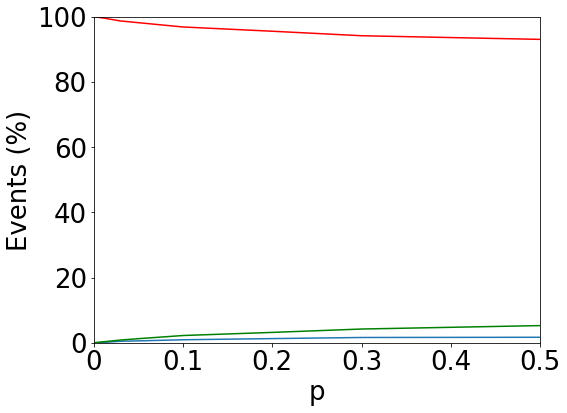

In [107]:
#plot WAR-PEACE-COMMON GROWTH with probability of event
P = [9 / x for x in num4p]

mean_com_gr = np.mean(Common_growth,axis=1)
mean_peace = np.mean(Peace,axis=1)
mean_war = np.mean(War,axis=1)

fig, ax = plt.subplots(figsize=[8,6])

ax.plot(P, mean_com_gr, label='Cooperation')
ax.plot(P, mean_peace, 'g', label='Peace')
ax.plot(P, mean_war, 'r', label='War')
ax.set_xlabel('p',fontsize=26)
ax.set_ylabel("Events (%)",fontsize=26)
ax.tick_params(labelsize=26)
#ax.legend(fontsize=26);
ax.set_ylim([0,100])
ax.set_xlim([0,0.5])
labels = ['0','0.1','0.2','0.3','0.4','0.5']
x = [0.0,0.1,0.2,0.3,0.4,0.5]
plt.xticks(x,labels);
#fig.savefig('Figure 3 events simultaneous.pdf');

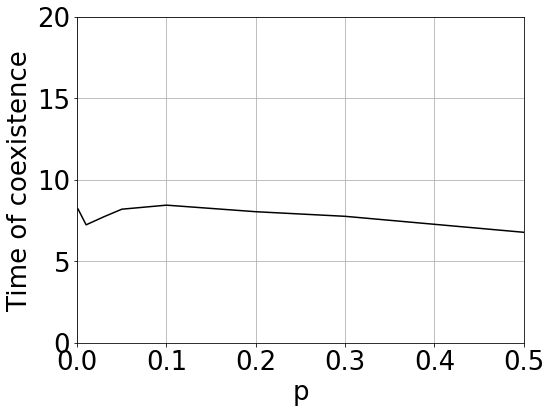

In [108]:
fig, ax = plt.subplots(figsize=[8,6])
mean_time = np.mean(time,axis=1)
ax.plot(P, mean_time, 'k', label='time of coexistence')
ax.set_xlabel('p',fontsize=26)
ax.set_ylabel("Time of coexistence",fontsize=26)
#ax.set_yscale('log')
ax.tick_params(labelsize=26)
#ax.legend(fontsize='xx-large')
ax.grid()
ax.set_ylim([0,20])
ax.set_xlim([0,0.5]);
#fig.savefig('Time of coexistence Sim.png');

In [109]:
mean_time

array([8.1965, 7.2347, 7.7309, 8.1925, 8.4405, 8.0386, 7.7562, 6.777 ])

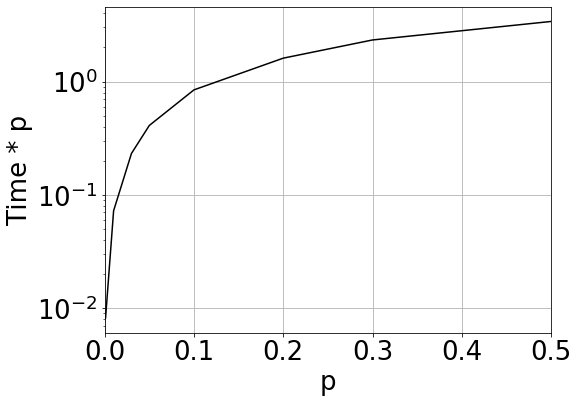

In [110]:
fig, ax = plt.subplots(figsize=[8,6])
mean_time = np.mean(time,axis=1)
ax.plot(P, mean_time*P, 'k', label='time of coexistence')
ax.set_xlabel('p',fontsize=26)
ax.set_ylabel("Time * p",fontsize=26)
ax.set_yscale('log')
ax.tick_params(labelsize=26)
#ax.legend(fontsize='xx-large')
ax.grid()
#ax.set_ylim([1,10**4])
ax.set_xlim([0,0.5]);
#fig.savefig('Time of coexistence Non-Sim.png');

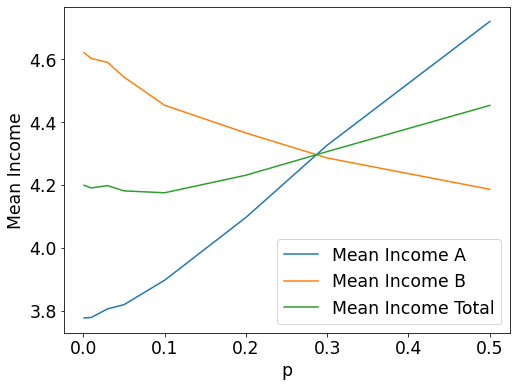

In [111]:
fig, ax = plt.subplots(figsize=[8,6])
mean_inc_tot = np.mean(Mean_Inc, axis=1)
mean_inc_A = np.mean(Mean_IncA, axis=1)
mean_inc_B = np.mean(Mean_IncB, axis=1)
ax.plot(P, mean_inc_A, label='Mean Income A')
ax.plot(P, mean_inc_B, label='Mean Income B')
ax.plot(P, mean_inc_tot, label='Mean Income Total')
ax.set_xlabel('p',fontsize='xx-large')
ax.set_ylabel("Mean Income",fontsize='xx-large')
#ax.set_yscale('log')
ax.tick_params(labelsize='xx-large')
ax.legend(fontsize='xx-large');
#fig.savefig('Mean Income with p.png');

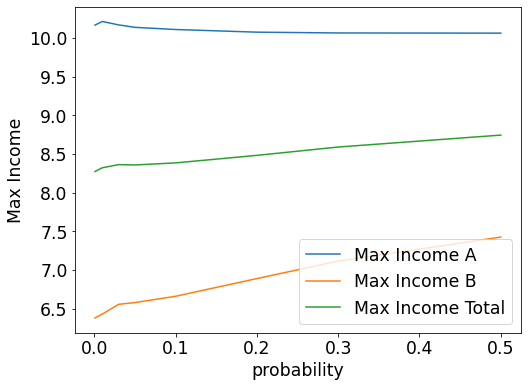

In [112]:
fig, ax = plt.subplots(figsize=[8,6])
max_inc_tot = np.mean(Max_Inc,axis=1)
max_inc_A = np.mean(Max_IncA,axis=1)
max_inc_B = np.mean(Max_IncB,axis=1)
ax.plot(P, max_inc_A, label='Max Income A')
ax.plot(P, max_inc_B, label='Max Income B')
ax.plot(P, max_inc_tot, label='Max Income Total')
ax.set_xlabel('probability',fontsize='xx-large')
ax.set_ylabel("Max Income",fontsize='xx-large')
#ax.set_yscale('log')
ax.tick_params(labelsize='xx-large')
ax.legend(fontsize='xx-large');
#fig.savefig('Max Income with p.png');

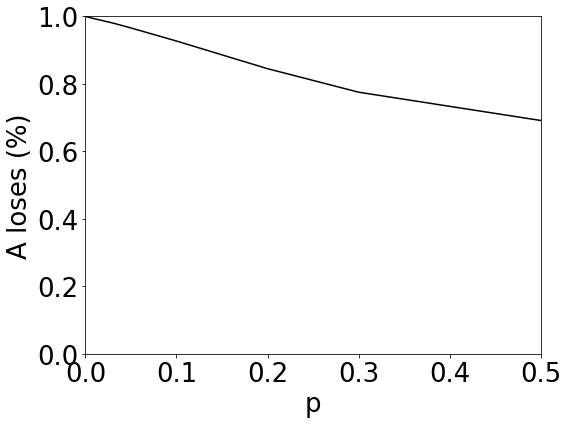

In [113]:
fig, ax = plt.subplots(figsize=[8,6])
mean_time = np.mean(time,axis=1)
ax.plot(P, A_loses_percentage, 'k', label='time of coexistence')
ax.set_xlabel('p',fontsize=26)
ax.set_ylabel("A loses (%)",fontsize=26)
ax.tick_params(labelsize=26)
#ax.legend(fontsize='xx-large')
ax.set_ylim([0,1])
ax.set_xlim([0,0.5])
fig.tight_layout();
#fig.savefig('Time of coexistence Non-Sim.png');

In [114]:
A_loses_percentage

[0.9994, 0.9931, 0.9805, 0.9658, 0.927, 0.845, 0.7753, 0.6914]

In [115]:
mean_inc_B

array([4.62098241, 4.60264347, 4.59016186, 4.54367166, 4.45371142,
       4.36542685, 4.28583382, 4.18606086])